# 数字图像处理实验六

## 任务1

- 请编写代码，实现一个拉普拉斯算子，对图像blurry_moon.tif进行锐化

- 并和函数库自带的拉普拉斯算子滤波函数进行结果比较。


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
blurry_moon = cv2.imread("blurry_moon.tif",0)

In [3]:
def show(imglist:list):
    for id,img in enumerate(imglist):
        cv2.imshow(f"{id}",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def show_plt(imglist):
    for img in imglist:
        plt.imshow(img[:,:,::-1])
        plt.show()

In [4]:
def Laplacian(img,c=0.1):
    '''
    第一种实现，手动卷积
    img:原图像
    c:锐化系数
    卷积是需要padding的，但我懒
    '''
    laplace_filter = np.array([
         [1, 1, 1],
         [1, -8, 1],
         [1, 1, 1],
     ])
    laplacian_img = img.copy()
    rows,cols = img.shape
    krows,kcols = 3,3
    w = int(krows/2)
    h = int(kcols/2)
    for i in range(w,rows-w):
        for j in range(h,cols-h): # 遍历取平均值
            block = img[i-w:i+w+1, j-h:j+h+1] # 注意block范围
            R = np.sum(laplace_filter * block) 
            laplacian_img[i, j] = c*R
    return laplacian_img

In [5]:
def Laplacian_filter(img):
    '''
    第二种实现方法，使用Opencv自己的卷积函数
    img:原图像
    '''
    laplace_kernel = np.array([[1, 1, 1],
                               [1, -8, 1],
                               [1, 1, 1]],dtype=np.float32)
    dst = cv2.filter2D(img, -1, laplace_kernel)
    # dst = img.copy()+dst
    return dst

In [8]:
%%time
Lblurry_moon=Laplacian_filter(blurry_moon)

Wall time: 0 ns


In [9]:
%%time
Lblurry_moon_cv=cv2.Laplacian(blurry_moon, -1,3)

Wall time: 0 ns


In [10]:
show([Lblurry_moon,Lblurry_moon_cv])

In [21]:
show([blurry_moon,cv2.add(blurry_moon,Lblurry_moon),cv2.add(blurry_moon,Lblurry_moon_cv)])

## 任务2

- 请编写代码，实现一种梯度算子，并和函数库自带的梯度算子函数进行结果比较。

- 至少在以下图像上测试：magic.png，plate.png，lane.png


In [12]:
def Sobel(img):
    kernel = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)
    dst_v = cv2.filter2D(img, -1, kernel)   # 横向
    dst_h = cv2.filter2D(img, -1, kernel.T) # 纵向
    return cv2.add(dst_v,dst_h),dst_v,dst_h

In [13]:
magic = cv2.imread("magic.png",0)
plate = cv2.imread("plate.png",0)
lane = cv2.imread("lane.png",0)

In [14]:
def SobleTest(img):
    Sbl,_,_ = Sobel(img)
    Sbl_cv = cv2.add(cv2.Sobel(img, -1, 1, 0, ksize=3),cv2.Sobel(img, -1, 0, 1, ksize=3))
    show([Sbl,Sbl_cv])
    show([img,cv2.add(img,Sbl),cv2.add(img,Sbl_cv)])

In [22]:
SobleTest(magic)

In [23]:
SobleTest(plate)

In [26]:
SobleTest(lane)

## 任务3

- 请编写代码，对cameraman.tif 进行傅里叶变换，并对结果可视化

In [18]:
cameraman = cv2.imread("cameraman.tif",0)

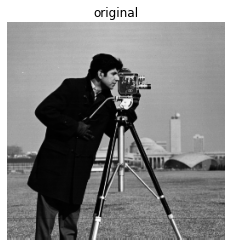

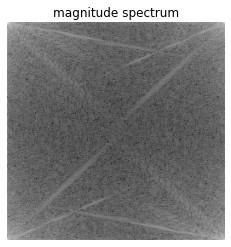

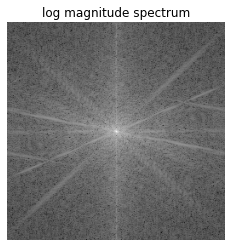

In [29]:
fourier = np.fft.fft2(cameraman)  # 进行傅里叶变换
fouriershift = np.fft.fftshift(fourier) # 将FFT输出中的直流分量移动到频谱的中央
magnitude_spectrum  = 20 * np.log(np.abs(fourier)) # 对复数数组进行调整得到幅度谱
log_magnitude_spectrum = 20 * np.log(np.abs(fouriershift)+1) # 幅度谱取对数
plt.imshow(cameraman , cmap = 'gray')
plt.title('original')
plt.axis('off')
plt.show()
plt.imshow(magnitude_spectrum , cmap = 'gray')
plt.title('magnitude spectrum')
plt.axis('off')
plt.show()
plt.imshow(log_magnitude_spectrum , cmap = 'gray')
plt.title("log magnitude spectrum")
plt.axis('off')
plt.show()